In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
#mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_preyvis240v2_dphi_astr_vor_mill_astr_dphi.npy")
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_dphi_occ_mill4_astr_dphi.npy")
#pol =  np.load("/home/lars/vmodel_output/longsim_data/longsim_preyvis240v2_dphi_astr_vor_pol_astr_dphi.npy")
#comdisp = np.load("/home/lars/vmodel_output/longsim_data/longsim_preyvis240v2_dphi_astr_vor_comdis_astr_dphi.npy")

NameError: name 'np' is not defined

In [5]:
def calc_order(vel: np.ndarray) -> float:
    """Compute order parameter from velocity matrix
    Args:
        vel: velocity matrix (N x D)
    Returns:
        order: velocity correlation
    """
    N, _ = vel.shape
    speed = np.linalg.norm(vel, axis=1, keepdims=True)  # N x 1
    speed_prod = speed.dot(speed.T)  # N x N
    mask = (speed_prod != 0)  # avoid division by zero!
    dot_prod = vel.dot(vel.T)  # N x N
    np.fill_diagonal(dot_prod, 0)  # i != j
    return (dot_prod[mask] / speed_prod[mask]).sum() / (N * (N - 1))





In [18]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_dphi_occ_mill4_astr_dphi.npy")
mill2 = np.load("/home/lars/vmodel_output/test_mill_longsim_mill_astr_dphi.npy")


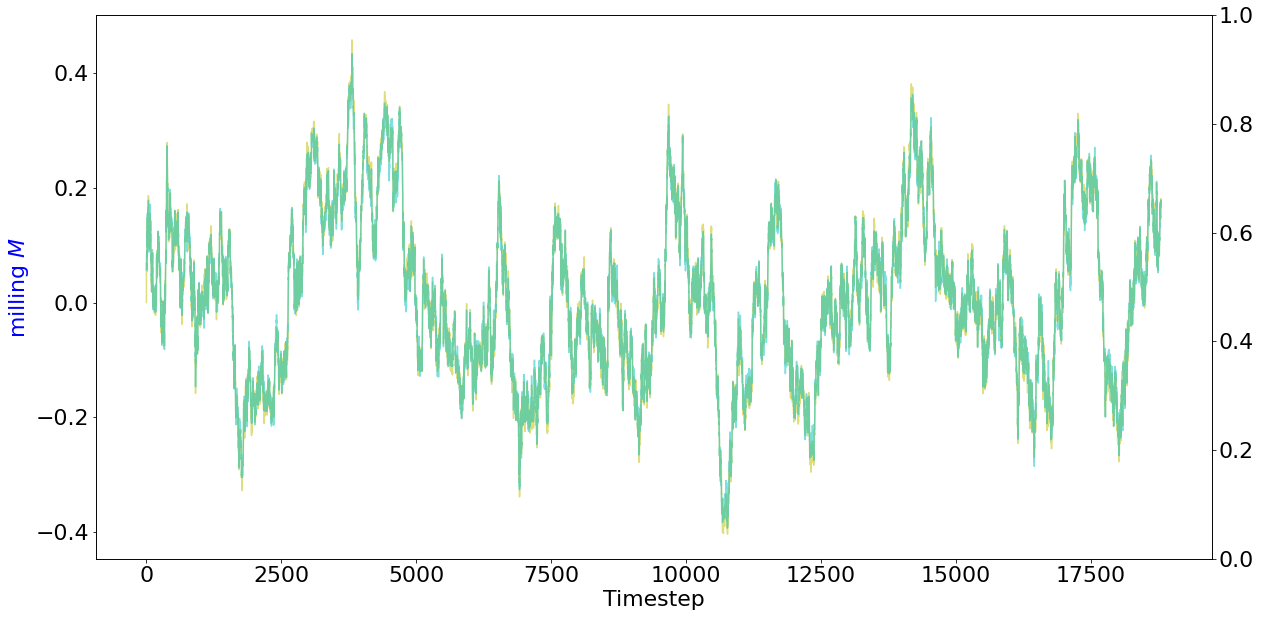

In [25]:
fig, ax1 = plt.subplots(1,1, figsize=(20,10))
rep = 18
astr = 3
dphi = 1

steps, steps, reps, time = np.shape(mill)
x = range(time)

ax2 = ax1.twinx()
ax1.plot(x, (mill[astr,dphi,rep,:]), 'y-', alpha = 0.5)
ax1.plot(x, mill2[astr,dphi,rep,:]/75, 'c-', alpha=0.5)

ax1.set_xlabel('Timestep')
#ax1.set_ylim(0,80)
#ax2.set_ylim(0,1)
ax1.set_ylabel('milling ${M}$', color='b')
#ax2.set_ylabel('Polarization', color='c')

plt.rcParams.update({'font.size': 22})

plt.savefig("compare_millmethods.pdf",bbox_inches="tight")

In [15]:
rep = 4
np.max(mill[astr,dphi,rep,:])

0.43836149825058723

In [16]:
np.nanmax(mill2[astr,dphi,rep,:])/90

0.36837306459307356

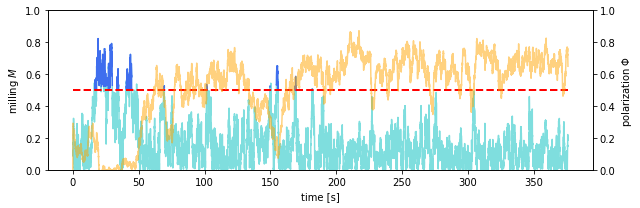

In [5]:
rep = 8
astr = 5
dphi = 1
thresh = 0.5

mill = abs(np.load("/home/lars/vmodel_output/longsim_data/longsim_dphi_occ_mill5_astr_dphi.npy")[astr,dphi,rep,:])
#mill = abs(np.load("/home/lars/vmodel_output/test_mill_longsim_mill_astr_dphi.npy")[astr,dphi,rep,:])
pol =  np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")[astr,dphi,rep,:]
fig, ax1 = plt.subplots(1,1, figsize=(20,10))



mill_top = np.copy(mill)
mill_top[mill_top < thresh] = "NaN"

time = len(mill)
x = np.array(range(time))*0.02

ax2 = ax1.twinx()
ax1.plot(x, (mill), 'c-', alpha = 0.5)
ax1.plot(x, mill_top, 'b-', alpha=0.5)
ax2.plot(x, pol, color = "orange", alpha = 0.5)
ax1.hlines(y=thresh, xmin=0, xmax=max(x), linewidth=2, color='r', linestyles = "--")
ax1.set_xlabel('time [s]')
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax1.set_ylabel('milling ${M}$')

ax2.set_ylabel('polarization $Φ$')

#plt.rcParams.update({'font.size': 22})
plt.gcf().set_size_inches(9,3)
plt.tight_layout()
plt.savefig("milling5_series.pdf",bbox_inches="tight")


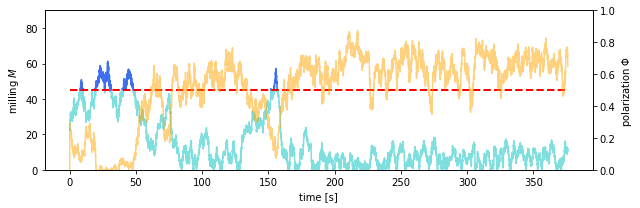

In [6]:
rep = 8
astr = 5
dphi = 1
thresh = 45

#mill = abs(np.load("/home/lars/vmodel_output/longsim_data/longsim_dphi_occ_mill5_astr_dphi.npy")[astr,dphi,rep,:])
mill = abs(np.load("/home/lars/vmodel_output/test_mill_longsim_mill_astr_dphi.npy")[astr,dphi,rep,:])
pol =  np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")[astr,dphi,rep,:]
fig, ax1 = plt.subplots(1,1, figsize=(20,10))



mill_top = np.copy(mill)
mill_top[mill_top < thresh] = "NaN"

time = len(mill)
x = np.array(range(time))*0.02

ax2 = ax1.twinx()
ax1.plot(x, (mill), 'c-', alpha = 0.5)
ax1.plot(x, mill_top, 'b-', alpha=0.5)
ax2.plot(x, pol, color = "orange", alpha = 0.5)
ax1.hlines(y=thresh, xmin=0, xmax=max(x), linewidth=2, color='black', linestyles = "--")
ax1.set_xlabel('timesteps')
ax1.set_ylim(0,90)
ax2.set_ylim(0,1)
ax1.set_ylabel('milling ${M}$')

ax2.set_ylabel('polarization $Φ$')

#plt.rcParams.update({'font.size': 22})
plt.gcf().set_size_inches(9,3)
plt.tight_layout()
plt.savefig("milling_series.pdf",bbox_inches="tight")


In [18]:
file_h5 = "/home/lars/vmodel_output/nicemill_8_nprey_100_npred_1_frange_10_fstr_0.0_visPred_120_visPrey_280.0_astr_2.5_dphi_0.1_repPrey_3_repRadPrey_1.5_repPred_21_repRadPred_20_attPrey_3_attRadPrey_1.5_repCol_10000000_hstr_1_steps_10000_fangle_30.0_pangle_0.states.nc"
        
nprey = 100
reps = 5

mil_scan = np.zeros((reps, 10000))
mil_ring_scan = np.zeros((reps, 10000))
pol_scan = np.zeros((reps, 10000))


with h5py.File(file_h5) as fh5:
    vel = np.moveaxis(np.array(fh5['/velocity']), [3,2], [1,3])[:,:,:,:]
    pos = np.moveaxis(np.array(fh5['/position']), [3,2], [1,3])[:,:,:,:]
                
    for rep in range(reps):
            
        print(rep)

        vel_rep = vel[rep,:,:nprey,:]
        pos_rep = pos[rep,:,:nprey,:]


        time, N, dim = np.shape(pos_rep)
                    #time -= 10000
        com_pos = np.zeros((time,2))
        angle_time = []
        angle_time_full = np.zeros((time, N, 2))

        for ii in range(time):
            com_pos[ii] = np.mean(pos_rep[ii,:,0]),np.mean(pos_rep[ii,:,1])
            dir_com = com_pos[ii] - pos_rep[ii,:,:]
            pol_scan[rep,ii] = calc_order(vel_rep[ii,:,:])

            angle = 0
            angle_ring=[]
            for jj in range(nprey):
                a = ((dir_com[jj,0],dir_com[jj,1]))
                a_len = a_len = np.linalg.norm(a)
                b = ((vel_rep[ii,jj,0],vel_rep[ii,jj,1]))
                            
                mill = (np.cross((a/a_len),b))
                angle += mill
                if a_len <= 2:
                        
                    b_len = np.linalg.norm(b)
                    mill_ring = (np.cross(a/a_len,b/b_len))
                    angle_ring.append(mill_ring)
                            
                

            mil_scan[rep,ii] = angle/nprey
            mil_ring_scan[rep,ii] = np.mean(angle_ring)
            

0


/tmp/ipykernel_141065/348726035.py:46: RuntimeWarning: invalid value encountered in true_divide
  mill_ring = (np.cross(a/a_len,b/b_len))


1
2
3
4


In [19]:
#np.save("test1_mill5_8", mil_scan)
#np.save("test1_pol_8", pol_scan)
#np.save("test1_mill5_ring_8", mil_ring_scan)

In [4]:
def multicolor_ylabel(ax,list_of_strings,list_of_colors,axis='x',anchorpad=0,**kw):
    """this function creates axes labels with multiple colors
    ax specifies the axes object where the labels should be drawn
    list_of_strings is a list of all of the text items
    list_if_colors is a corresponding list of colors for the strings
    axis='x', 'y', or 'both' and specifies which label(s) should be drawn"""
    from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

    # x-axis label
    if axis=='x' or axis=='both':
        boxes = [TextArea(text, textprops=dict(color=color, ha='left',va='bottom',**kw)) 
                    for text,color in zip(list_of_strings,list_of_colors) ]
        xbox = HPacker(children=boxes,align="center",pad=0, sep=5)
        anchored_xbox = AnchoredOffsetbox(loc=3, child=xbox, pad=anchorpad,frameon=False,bbox_to_anchor=(0.2, -0.09),
                                          bbox_transform=ax.transAxes, borderpad=0.)
        ax.add_artist(anchored_xbox)

    # y-axis label
    if axis=='y' or axis=='both':
        boxes = [TextArea(text, textprops=dict(color=color, ha='left',va='bottom',rotation=90,**kw)) 
                     for text,color in zip(list_of_strings[::-1],list_of_colors) ]
        ybox = VPacker(children=boxes,align="center", pad=0, sep=5)
        anchored_ybox = AnchoredOffsetbox(loc=3, child=ybox, pad=anchorpad, frameon=False, bbox_to_anchor=(-0.150, 0.3), 
                                          bbox_transform=ax.transAxes, borderpad=0.)
        ax.add_artist(anchored_ybox)

In [62]:
test = mill[:199998]-mill[1:]

mill[mill < thresh] = -1
mill[mill >= thresh] = 1

phases = []
count = 0
for i in range(len(mill)-1):
    i = i+1
    count += 1
    if mill[i] != mill[i-1]:
        phases.append(count)
        count = 0
    else:
        count += 1

In [64]:
np.sum(phases)

399835

In [51]:
barlocs = np.argwhere(abs(test))

In [57]:
a = np.array((1,1,1,-1, -1, -1, 1, 1, 1))
a[:8]-a[1:]

array([ 0,  0,  2,  0,  0, -2,  0,  0])

In [ ]:
for i in range(len(phases)-1):
    i = i+1
    if i%2 == 0:
        col = "blue"

    else:
        col = "red"
        
    ax1[0].barh(np.array(range(np.sum(phases))), phases[i], left = phases[i-1], color=col)  

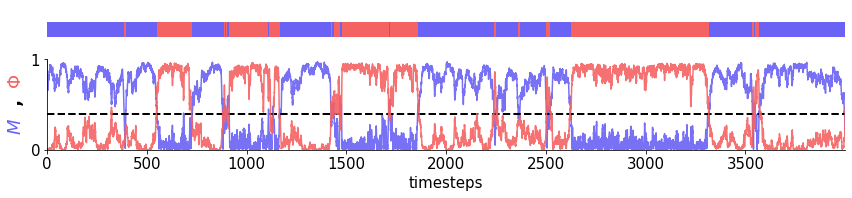

In [37]:
def multicolor_ylabel(ax,list_of_strings,list_of_colors,axis='x',anchorpad=0,**kw):
    """this function creates axes labels with multiple colors
    ax specifies the axes object where the labels should be drawn
    list_of_strings is a list of all of the text items
    list_if_colors is a corresponding list of colors for the strings
    axis='x', 'y', or 'both' and specifies which label(s) should be drawn"""
    from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

    # x-axis label
    if axis=='x' or axis=='both':
        boxes = [TextArea(text, textprops=dict(color=color, ha='left',va='bottom',**kw)) 
                    for text,color in zip(list_of_strings,list_of_colors) ]
        xbox = HPacker(children=boxes,align="center",pad=0, sep=5)
        anchored_xbox = AnchoredOffsetbox(loc=3, child=xbox, pad=anchorpad,frameon=False,bbox_to_anchor=(0.2, -0.09),
                                          bbox_transform=ax.transAxes, borderpad=0.)
        ax.add_artist(anchored_xbox)

    # y-axis label
    if axis=='y' or axis=='both':
        boxes = [TextArea(text, textprops=dict(color=color, ha='left',va='bottom',rotation=90,**kw)) 
                     for text,color in zip(list_of_strings[::-1],list_of_colors) ]
        ybox = VPacker(children=boxes,align="center", pad=0, sep=5)
        anchored_ybox = AnchoredOffsetbox(loc=3, child=ybox, pad=anchorpad, frameon=False, bbox_to_anchor=(-0.05, 0.12), 
                                          bbox_transform=ax.transAxes, borderpad=0.)
        ax.add_artist(anchored_ybox)

pol_scan = np.load("/home/lars/vmodel_output/test1_pol_8.npy")
mil_scan = np.load("/home/lars/vmodel_output/test1_mill5_8.npy")
#mil_ring_scan = np.load("test1_mill5_ring_8.npy")


rep = 1
astr = 0
dphi = 0
time = 200000

thresh = 0.4

SMALL_SIZE = 15
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)

pol = pol_scan[rep, 1:time]
mill = abs(mil_scan[rep, 1:time])

mill_top = np.copy(mill)
mill_top[mill_top < thresh] = "NaN"

fig, ax1 = plt.subplots(2,1, figsize=(20,10), sharey = True,gridspec_kw={'height_ratios': [1, 3]})
x = (np.array(range(time-1))*0.02)

sampling = 10
pol = pol[::sampling]
mill = mill[::sampling]
x = x[::sampling]

ax1[1].plot(x, (mill), '#6962f5', alpha = 0.9)
ax1[1].hlines(y=thresh, xmin=0, xmax=max(x), linewidth=2, color='black', linestyles = "--")
ax1[1].plot(x, pol, color = "#f56262", alpha = 0.9)
ax1[1].set_xlabel('timesteps')
ax1[1].set_ylim(0,1)

multicolor_ylabel(ax1[1],('${M}$',' ,','$Φ$'),('#f56262','k','#6962f5'),axis='y',size=18,weight='bold')

mill[mill < thresh] = -1
mill[mill >= thresh] = 1

new_array = [1]*len(mill)
colors = [('#6962f5' if i == 1 else '#f56262') for i in mill]
for i,a in enumerate(new_array):
    ax1[0].barh(y=0, width=a, height=1, left=i, color=colors[i])

ax1[0].set_xlim(0, len(mill))
   
ax1[0].spines[['right', 'top', 'left', 'bottom']].set_visible(False)
ax1[0].axes.get_yaxis().set_visible(False)
ax1[0].axes.get_xaxis().set_visible(False)

ax1[1].spines[['right', 'top']].set_visible(False)


#plt.rcParams.update({'font.size': 22})
plt.gcf().set_size_inches(12,3)
plt.margins(x=0)
plt.tight_layout()
plt.savefig("milling_series_"+str(rep)+".pdf",bbox_inches="tight")

In [11]:
75/0.02

3750.0

In [16]:
a = ((1,2,3))
print(a[1:])

(2, 3)


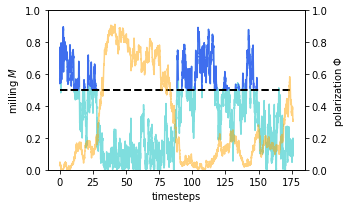

In [14]:
rep = 4

astr = 0
dphi = 0
time = 10000-1200

thresh = 0.5

#mill = mill[astr,dphi,rep,:]
pol = pol_scan[rep, 1:time]
mill = abs(mil_ring_scan[rep, 1:time])

mill_top = np.copy(mill)
mill_top[mill_top < thresh] = "NaN"

fig, ax1 = plt.subplots(1,1, figsize=(20,10), sharey = True)
#steps, steps, reps, time = np.shape(mill)
x = (np.array(range(time-1))*0.02)

ax2 = ax1.twinx()
ax1.plot(x, (mill), 'c-', alpha = 0.5)
ax1.plot(x, mill_top, 'b-', alpha=0.5)
ax1.hlines(y=thresh, xmin=0, xmax=max(x), linewidth=2, color='black', linestyles = "--")
ax2.plot(x, pol, color = "orange", alpha = 0.5)
ax1.set_xlabel('timesteps')
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax1.set_ylabel('milling ${M}$')
ax2.set_ylabel('polarization $Φ$')

#ax2.set_ylabel('Polarization', color='c')

#plt.rcParams.update({'font.size': 22})
plt.gcf().set_size_inches(5,3)
plt.tight_layout()
plt.savefig("milling_series_ring.pdf",bbox_inches="tight")

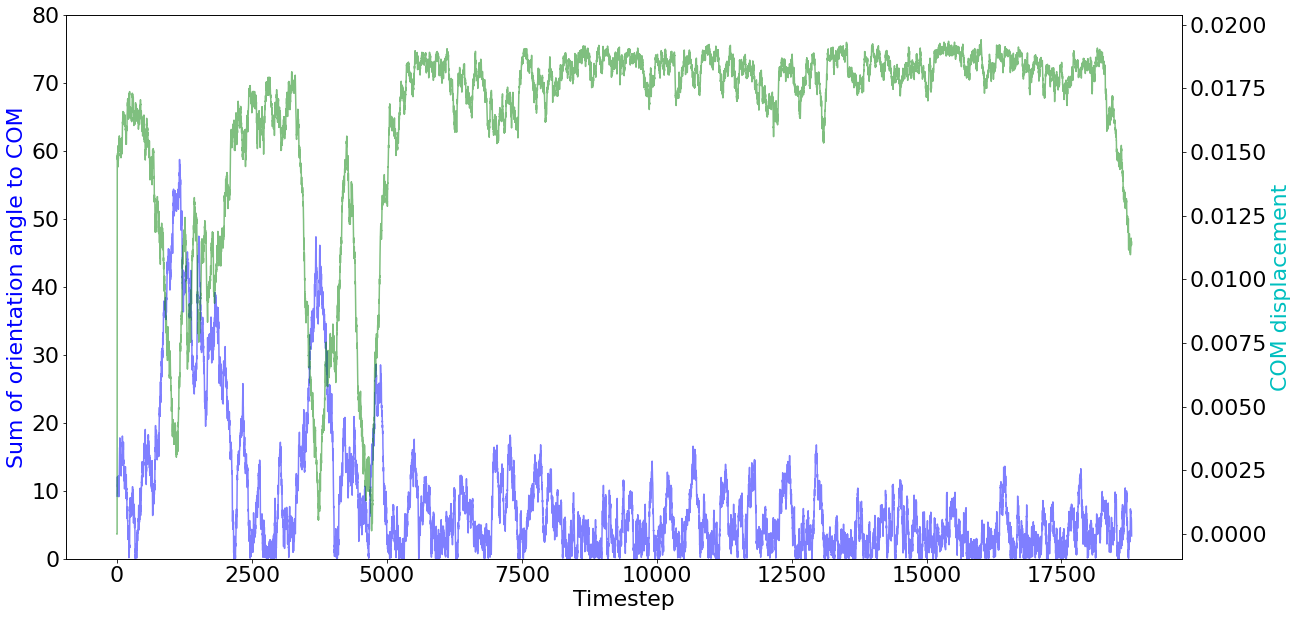

In [19]:
fig, ax1 = plt.subplots(1,1, figsize=(20,10))

rep = 1
astr = 9
dphi = 3



steps, steps, reps, time = np.shape(mill)
x = range(time)
comdisp[:,:,:,0:1] = 0
ax2 = ax1.twinx()
ax1.plot(x, abs(mill[astr,dphi,rep,:]), 'b-', alpha = 0.5)
ax2.plot(x, comdisp[astr,dphi,rep,:], 'g-', alpha=0.5)

ax1.set_xlabel('Timestep')
ax1.set_ylim(0,80)
#ax2.set_ylim(0,1)
ax1.set_ylabel('Sum of orientation angle to COM', color='b')
ax2.set_ylabel('COM displacement', color='c')

plt.rcParams.update({'font.size': 22})

plt.show()

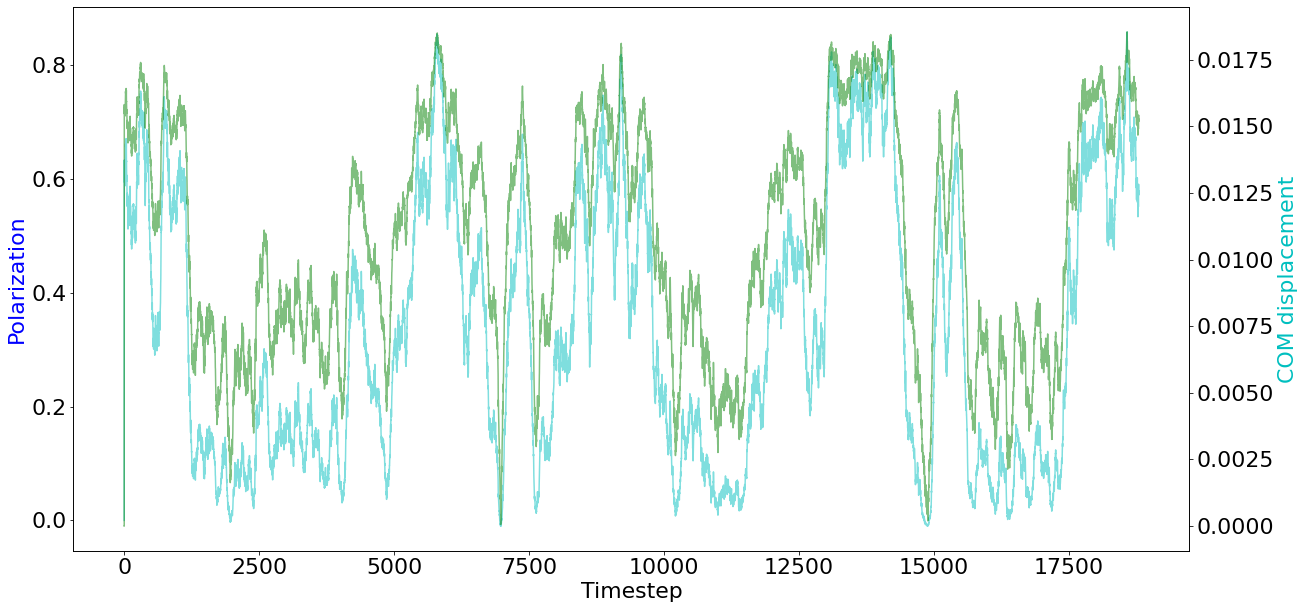

In [14]:
fig, ax1 = plt.subplots(1,1, figsize=(20,10))

rep = 1
astr = 9
dphi = 3

steps, steps, reps, time = np.shape(mill)
x = range(time)
comdisp[:,:,:,0:2] = 0
ax2 = ax1.twinx()
ax1.plot(x, pol[astr,dphi,rep,:], 'c-', alpha=0.5)
ax2.plot(x, comdisp[astr,dphi,rep,:], 'g-', alpha=0.5)

ax1.set_xlabel('Timestep')
#ax1.set_ylim(0,80)
#ax2.set_ylim(0,1)
ax1.set_ylabel('Polarization', color='b')
ax2.set_ylabel('COM displacement', color='c')

plt.rcParams.update({'font.size': 22})

plt.show()

In [3]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_preyvis240v2_dphi_astr_occ_Col_mill_astr_dphi.npy")
pol = np.load("/home/lars/vmodel_output/longsim_visprey240v2_dphi_astr_occ_Col_pol_astr_dphi.npy")
comdisp = np.load("/home/lars/vmodel_output/longsim_data/longsim_preyvis240v2_dphi_astr_occ_comdis_astr_dphi.npy")

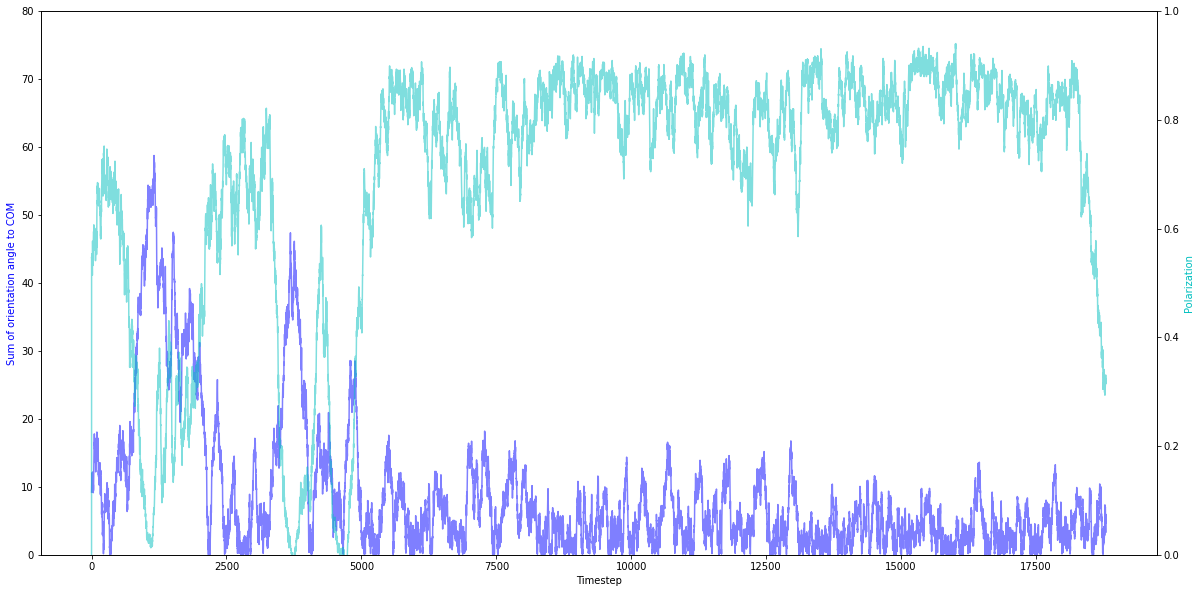

In [4]:
fig, ax1 = plt.subplots(1,1, figsize=(20,10))

rep = 1
astr = 9
dphi = 3

steps, steps, reps, time = np.shape(mill)
x = range(time)

ax2 = ax1.twinx()
ax1.plot(x, abs(mill[astr,dphi,rep,:]), 'b-', alpha = 0.5)
ax2.plot(x, pol[astr,dphi,rep,:], 'c-', alpha=0.5)

ax1.set_xlabel('Timestep')
ax1.set_ylim(0,80)
ax2.set_ylim(0,1)
ax1.set_ylabel('Sum of orientation angle to COM', color='b')
ax2.set_ylabel('Polarization', color='c')

plt.rcParams.update({'font.size': 22})

plt.show()

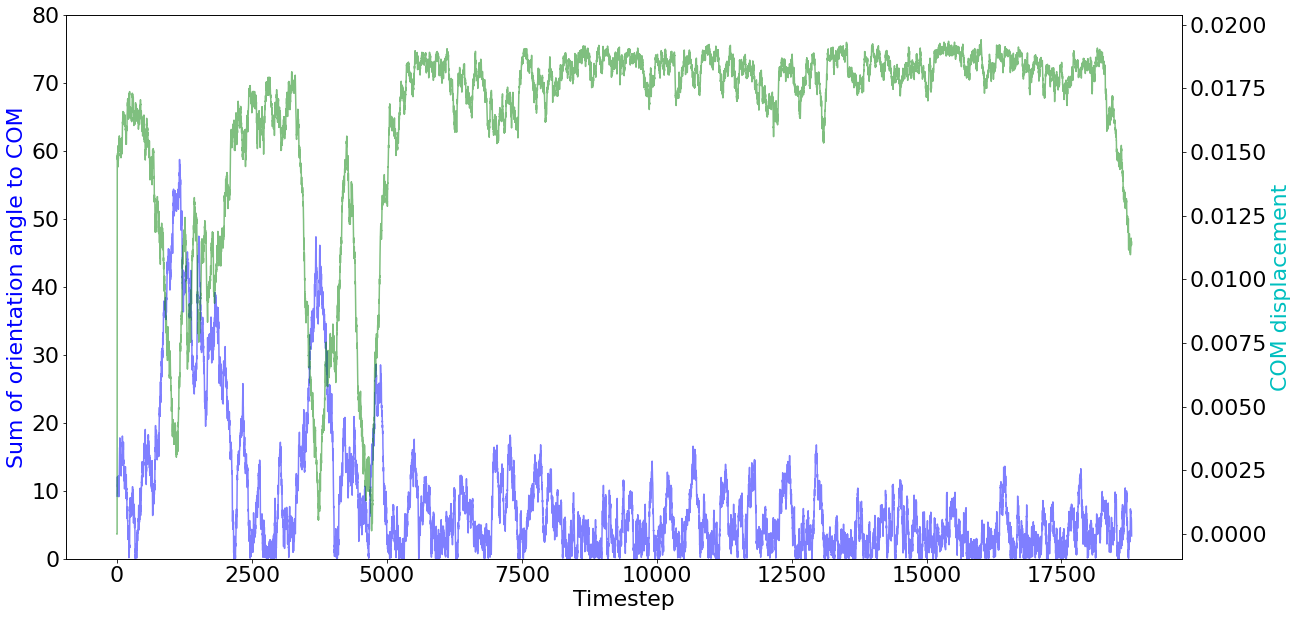

In [14]:
fig, ax1 = plt.subplots(1,1, figsize=(20,10))

rep = 1
astr = 9
dphi = 3

steps, steps, reps, time = np.shape(mill)
x = range(time)
comdisp[:,:,:,0:2] = 0
ax2 = ax1.twinx()
ax1.plot(x, abs(mill[astr,dphi,rep,:]), 'b-', alpha = 0.5)
ax2.plot(x, comdisp[astr,dphi,rep,:], 'g-', alpha=0.5)

ax1.set_xlabel('Timestep')
ax1.set_ylim(0,80)
#ax2.set_ylim(0,1)
ax1.set_ylabel('Sum of orientation angle to COM', color='b')
ax2.set_ylabel('COM displacement', color='c')

plt.rcParams.update({'font.size': 22})

plt.show()

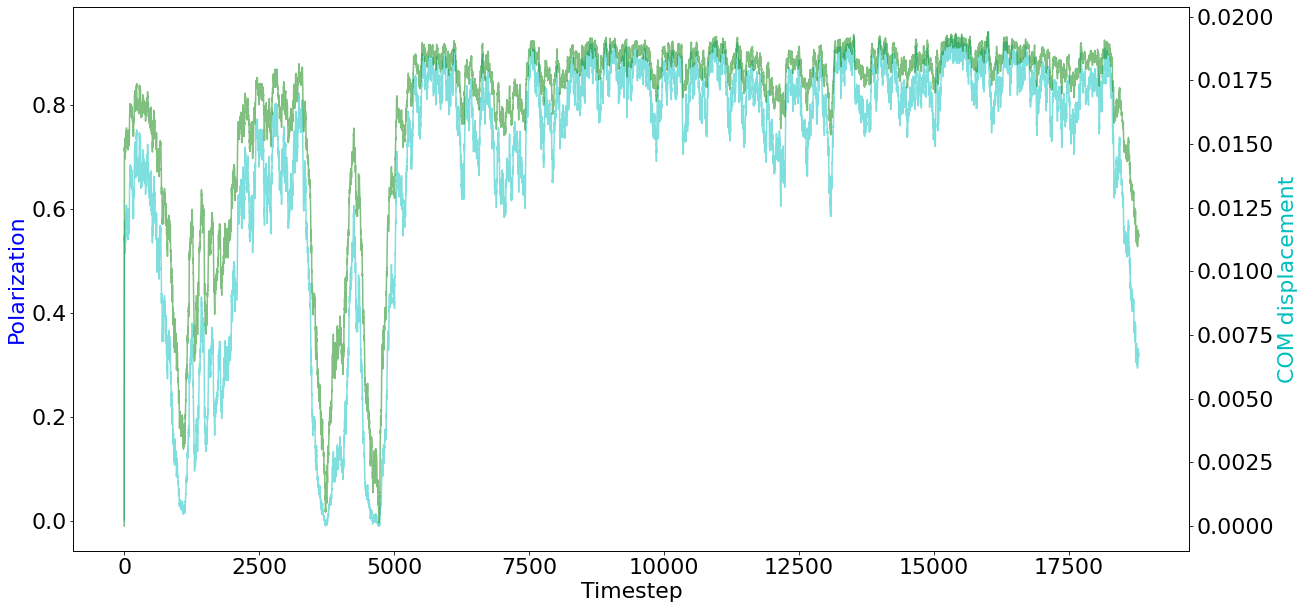

In [15]:
fig, ax1 = plt.subplots(1,1, figsize=(20,10))

rep = 1
astr = 9
dphi = 3

steps, steps, reps, time = np.shape(mill)
x = range(time)
comdisp[:,:,:,0:2] = 0
ax2 = ax1.twinx()
ax1.plot(x, pol[astr,dphi,rep,:], 'c-', alpha=0.5)
ax2.plot(x, comdisp[astr,dphi,rep,:], 'g-', alpha=0.5)

ax1.set_xlabel('Timestep')
#ax1.set_ylim(0,80)
#ax2.set_ylim(0,1)
ax1.set_ylabel('Polarization', color='b')
ax2.set_ylabel('COM displacement', color='c')

plt.rcParams.update({'font.size': 22})

plt.show()

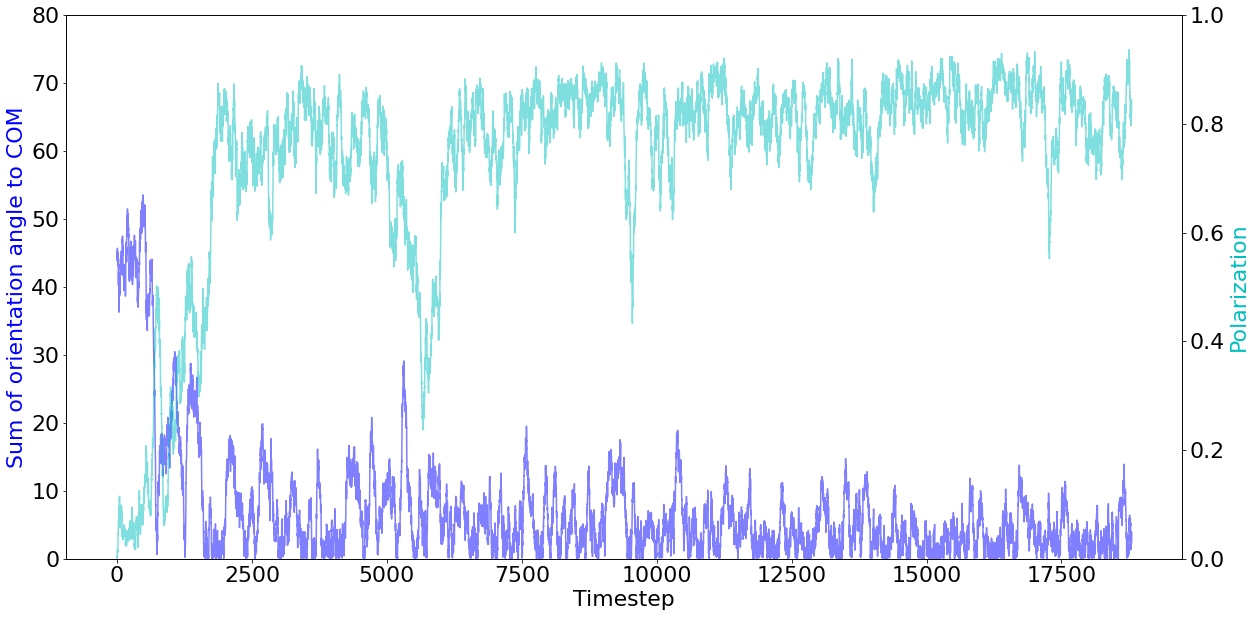

In [23]:
fig, ax1 = plt.subplots(1,1, figsize=(20,10))

rep = 13
astr = 9
dphi = 3

steps, steps, reps, time = np.shape(mill)
x = range(time)

ax2 = ax1.twinx()
ax1.plot(x, abs(mill[astr,dphi,rep,:]), 'b-', alpha = 0.5)
ax2.plot(x, pol[astr,dphi,rep,:], 'c-', alpha=0.5)

ax1.set_xlabel('Timestep')
ax1.set_ylim(0,80)
ax2.set_ylim(0,1)
ax1.set_ylabel('Sum of orientation angle to COM', color='b')
ax2.set_ylabel('Polarization', color='c')

plt.rcParams.update({'font.size': 22})

plt.show()

In [2]:
file_h5 = "/home/lars/vmodel_output/nicemill_8_nprey_100_npred_1_frange_10_fstr_0.0_visPred_120_visPrey_280.0_astr_2.5_dphi_0.1_repPrey_3_repRadPrey_1.5_repPred_21_repRadPred_20_attPrey_3_attRadPrey_1.5_repCol_10000000_hstr_1_steps_10000_fangle_30.0_pangle_0.states.nc"


nprey = 100
reps = 5

mil_scan = np.zeros((reps, 10000))
mil_ring_scan = np.zeros((reps, 10000))
pol_scan = np.zeros((reps, 10000))
i = 0

with h5py.File(file_h5) as fh5:
    #pos = np.moveaxis(np.array(fh5['/position']), [3,2], [1,3])[:,:,:,:]
    vis = np.array(fh5['/visibility'])[i,:100,:100,:]
    
    

In [16]:
np.shape(vis)

(100, 100, 8800)

In [5]:
vis[:,0,0]-vis[:,0,1]

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  1, -1,  0,  0,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int8)